Reading classics [Deep Learning Models](https://nbviewer.jupyter.org/github/rasbt/deeplearning-models/blob/master/pytorch_ipynb/cnn/cnn-allconv.ipynb)

## Code Modules & Functions

In [1]:
import numpy as np,pandas as pd,pylab as pl
import h5py,torch
from torchvision.datasets import MNIST as tmnist
from torchvision import transforms
from torch.utils.data import DataLoader as tdl
from torch.utils.data import Dataset as tds
import torch.nn.functional as tnnf
from IPython.core.magic import register_line_magic
dev=torch.device("cuda:0" if torch.cuda.is_available() 
                 else "cpu")

In [2]:
class TData(tds):
    def __init__(self,X,y):   
        self.X=torch.tensor(X,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.int32)
    def __getitem__(self,index):
        train_img,train_lbl=self.X[index],self.y[index]
        return train_img,train_lbl
    def __len__(self):
        return self.y.shape[0]
def model_acc(model,data_loader):
    correct_preds,num_examples=0,0    
    for features,targets in data_loader:
        features=features.to(dev)
        targets=targets.to(dev)
        logits,probs=model(features)
        _,pred_labels=torch.max(probs,1)
        num_examples+=targets.size(0)
        correct_preds+=(pred_labels==targets).sum()        
    return correct_preds.float()/num_examples*100

In [3]:
@register_line_magic
def train_run(epochs):
    epochs=int(epochs)
    for epoch in range(epochs):
        for batch_ids,(features,targets) in enumerate(train_loader):        
            features=features.to(dev)
            targets=targets.to(dev)
            logits,probs=model(features)
            cost=tnnf.cross_entropy(logits,targets)
            optimizer.zero_grad(); cost.backward()
            optimizer.step()
            if not batch_ids%300:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(epoch+1,epochs,batch_ids, 
                         len(train)//batch_size,cost))           
        with torch.set_grad_enabled(False):
            print('Epoch: %03d/%03d train accuracy: %.2f%%'%\
                  (epoch+1,epochs,model_acc(model,train_loader)))
@register_line_magic
def print_acc(t):
    if t=='test':
        print('Test accuracy: %.4f%%'%\
        (model_acc(model,test_loader)))
    if t=='train':
        print('Train accuracy: %.4f%%'%\
        (model_acc(model,train_loader)))

In [4]:
@register_line_magic
def train_run2(epochs):
    epochs=int(epochs)
    for epoch in range(epochs):
        for batch_ids,(features,targets) in enumerate(train_loader2):        
            features=features.to(dev)
            targets=targets.to(dev)
            logits,probs=model(features)
            cost=tnnf.cross_entropy(logits,targets.long())
            optimizer2.zero_grad(); cost.backward()
            optimizer2.step()
            if not batch_ids%100:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(epoch+1,epochs,batch_ids, 
                         len(train2)//batch_size2,cost))           
        with torch.set_grad_enabled(False):
            print('Epoch: %03d/%03d train accuracy: %.2f%%'%\
                  (epoch+1,epochs,model_acc(model,train_loader2)))
@register_line_magic
def print_acc2(t):
    if t=='test':
        print('Test accuracy: %.4f%%'%\
        (model_acc(model,test_loader2)))
    if t=='train':
        print('Train accuracy: %.4f%%'%\
        (model_acc(model,train_loader2)))

## Data

In [5]:
random_seed=23; batch_size=128
train=tmnist(root='data',train=True,download=True,
            transform=transforms.ToTensor())
test=tmnist(root='data',train=False, 
            transform=transforms.ToTensor())
train_loader=tdl(dataset=train,shuffle=True, 
                 batch_size=batch_size)
test_loader=tdl(dataset=test,shuffle=False, 
                batch_size=batch_size)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/opt/conda/conda-bld/pytorch_1587428190859/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.



Image dimensions: torch.Size([128, 1, 28, 28])
Label dimensions: torch.Size([128])




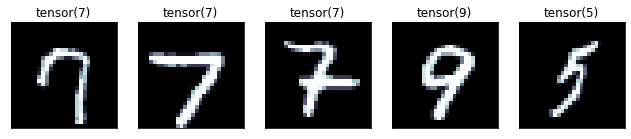

In [6]:
for images,labels in train_loader:  
    print('Image dimensions: %s'%str(images.shape))
    print('Label dimensions: %s'%str(labels.shape))
    n=np.random.randint(1,50)
    fig=pl.figure(figsize=(11,4))
    for i in range(n,n+5):
        ax=fig.add_subplot(1,5,i-n+1,\
        xticks=[],yticks=[],title=labels[i])
        ax.imshow((images[i]).reshape(28,28),
                  cmap=pl.cm.bone)
    break

['backgrounds', 'images', 'labels']


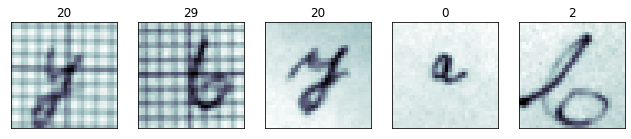

In [7]:
fpath='../input/classification-of-handwritten-letters/'
f='LetterColorImages_123.h5'
f=h5py.File(fpath+f,'r')
keys=list(f.keys()); print(keys)
x=np.array(f[keys[1]],dtype='float32')/255
x=(np.dot(x,[.299,.587,.114])).reshape(-1,1,32,32)
y=np.array(f[keys[2]],dtype='int32')-1
N=len(y); n=int(.2*N)
shuffle_ids=np.arange(N)
np.random.RandomState(23).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
x_test,x_train=x[:n],x[n:]
y_test,y_train=y[:n],y[n:]
x_train.shape,y_train.shape
fig=pl.figure(figsize=(11,4))
n=np.random.randint(1,50)
for i in range(n,n+5):
    ax=fig.add_subplot(1,5,i-n+1,\
    xticks=[],yticks=[],title=y_test[i])
    ax.imshow((x_test[i].reshape(32,32)),
              cmap=pl.cm.bone)

In [8]:
random_seed=1; batch_size2=128
train2=TData(x_train,y_train)
test2=TData(x_test,y_test)
train_loader2=tdl(dataset=train2,batch_size=batch_size2,shuffle=True)
test_loader2=tdl(dataset=test2,batch_size=batch_size2,shuffle=False)
for images,labels in train_loader2:  
    print('Image dimensions: %s'%str(images.shape))
    print('Label dimensions: %s'%str(labels.shape))
    break

Image dimensions: torch.Size([128, 1, 32, 32])
Label dimensions: torch.Size([128])


## All CNN
#### calculate same padding:
#### (w - k + 2 * p) / s + 1 = o => p = (s * (o - 1) - w + k) / 2

In [9]:
class FCNN(torch.nn.Module):
    def __init__(self,num_classes):
        super(FCNN,self).__init__()      
        self.num_classes=num_classes
        # 28x28x1 => 28x28x4; (1*(28-1)-28+3)/2=1
        self.conv1=torch.nn\
        .Conv2d(in_channels=1,out_channels=4,
                kernel_size=(3,3),stride=(1,1),padding=1)
        # 28x28x4 => 14x14x4
        self.conv2=torch.nn\
        .Conv2d(in_channels=4,out_channels=4,
                kernel_size=(3,3),stride=(2,2),padding=1)                             
        # 14x14x4 => 14x14x8; (1*(14-1)-14+3)/2=1
        self.conv3=torch.nn\
        .Conv2d(in_channels=4,out_channels=8,
                kernel_size=(3,3),stride=(1,1),padding=1)               
        # 14x14x8 => 7x7x8                             
        self.conv4=torch.nn\
        .Conv2d(in_channels=8,out_channels=8,
                kernel_size=(3,3),stride=(2,2),padding=1)             
        # 7x7x8 => 7x7x16; (1*(7-1)-7+3)/2=1                            
        self.conv5=torch.nn\
        .Conv2d(in_channels=8,out_channels=16,
                kernel_size=(3,3),stride=(1,1),padding=1)        
        # 7x7x16 => 4x4x16                             
        self.conv6=torch.nn\
        .Conv2d(in_channels=16,out_channels=16,
                kernel_size=(3,3),stride=(2,2),padding=1)             
        # 4x4x16 => 4x4xnum_classes; (1*(7-1)-7+3)/2=1                          
        self.conv7=torch.nn\
        .Conv2d(in_channels=16,out_channels=self.num_classes,
                kernel_size=(3,3),stride=(1,1),padding=1)           
    def forward(self,x):
        y=tnnf.relu(self.conv1(x))
        y=tnnf.relu(self.conv2(y))
        y=tnnf.relu(self.conv3(y))
        y=tnnf.relu(self.conv4(y))
        y=tnnf.relu(self.conv5(y))
        y=tnnf.relu(self.conv6(y))
        y=tnnf.relu(self.conv7(y))        
        logits=tnnf.adaptive_avg_pool2d(y,1)
        logits.squeeze_(-1) # drop width
        logits.squeeze_(-1) # drop height
        probs=torch.softmax(logits,dim=1)
        return logits,probs
torch.manual_seed(random_seed)
num_classes=10; learning_rate=.001
model=FCNN(num_classes=num_classes)
model=model.to(dev)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [10]:
%train_run 30

Epoch: 001/030 | Batch 000/468 | Cost: 2.3040
Epoch: 001/030 | Batch 300/468 | Cost: 0.8680
Epoch: 001/030 train accuracy: 77.29%
Epoch: 002/030 | Batch 000/468 | Cost: 0.6494
Epoch: 002/030 | Batch 300/468 | Cost: 0.4369
Epoch: 002/030 train accuracy: 84.10%
Epoch: 003/030 | Batch 000/468 | Cost: 0.4921
Epoch: 003/030 | Batch 300/468 | Cost: 0.6061
Epoch: 003/030 train accuracy: 86.74%
Epoch: 004/030 | Batch 000/468 | Cost: 0.4699
Epoch: 004/030 | Batch 300/468 | Cost: 0.4120
Epoch: 004/030 train accuracy: 88.34%
Epoch: 005/030 | Batch 000/468 | Cost: 0.3821
Epoch: 005/030 | Batch 300/468 | Cost: 0.3194
Epoch: 005/030 train accuracy: 88.53%
Epoch: 006/030 | Batch 000/468 | Cost: 0.4578
Epoch: 006/030 | Batch 300/468 | Cost: 0.3818
Epoch: 006/030 train accuracy: 90.57%
Epoch: 007/030 | Batch 000/468 | Cost: 0.3712
Epoch: 007/030 | Batch 300/468 | Cost: 0.3502
Epoch: 007/030 train accuracy: 91.97%
Epoch: 008/030 | Batch 000/468 | Cost: 0.3584
Epoch: 008/030 | Batch 300/468 | Cost: 0.421

In [11]:
%print_acc train
%print_acc test

Train accuracy: 96.6717%
Test accuracy: 96.4700%


In [12]:
torch.manual_seed(random_seed)
num_classes=33; learning_rate=.001
model=FCNN(num_classes=num_classes)
model=model.to(dev)
optimizer2=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [13]:
%train_run2 100

Epoch: 001/100 | Batch 000/088 | Cost: 3.4995
Epoch: 001/100 train accuracy: 3.42%
Epoch: 002/100 | Batch 000/088 | Cost: 3.4960
Epoch: 002/100 train accuracy: 3.62%
Epoch: 003/100 | Batch 000/088 | Cost: 3.4943
Epoch: 003/100 train accuracy: 4.39%
Epoch: 004/100 | Batch 000/088 | Cost: 3.4505
Epoch: 004/100 train accuracy: 5.39%
Epoch: 005/100 | Batch 000/088 | Cost: 3.4435
Epoch: 005/100 train accuracy: 5.33%
Epoch: 006/100 | Batch 000/088 | Cost: 3.4476
Epoch: 006/100 train accuracy: 5.56%
Epoch: 007/100 | Batch 000/088 | Cost: 3.3972
Epoch: 007/100 train accuracy: 6.05%
Epoch: 008/100 | Batch 000/088 | Cost: 3.4623
Epoch: 008/100 train accuracy: 6.11%
Epoch: 009/100 | Batch 000/088 | Cost: 3.4282
Epoch: 009/100 train accuracy: 5.59%
Epoch: 010/100 | Batch 000/088 | Cost: 3.4235
Epoch: 010/100 train accuracy: 5.65%
Epoch: 011/100 | Batch 000/088 | Cost: 3.3858
Epoch: 011/100 train accuracy: 5.70%
Epoch: 012/100 | Batch 000/088 | Cost: 3.4184
Epoch: 012/100 train accuracy: 5.60%
Epoc

In [14]:
%print_acc2 train
%print_acc2 test

Train accuracy: 48.3880%
Test accuracy: 44.4679%
